## Vamos a extrer la información de los diferentes datasets de amazon 

In [1]:
import json
import pandas as pd
from glob import glob


def convert(x):
    ''' Convert a json string to a flat python dictionary
    which can be passed into Pandas. '''
    ob = json.loads(x)
    for k, v in ob.items():
        if isinstance(v, list):
            ob[k] = ','.join(str(v))
        elif isinstance(v, dict):
            for kk, vv in v.items():
                ob['%s_%s' % (k, kk)] = vv
            del ob[k]
    return ob

for json_filename in glob('*.json'):
    csv_filename = '%s.csv' % json_filename[:-5]
    print 'Converting %s to %s' % (json_filename, csv_filename)
    df = pd.DataFrame([convert(line) for line in file(json_filename)])
    df.to_csv(csv_filename, encoding='utf-8', index=False)

Converting important_words.json to important_words.csv


AttributeError: 'list' object has no attribute 'items'

<Container object of 5 artists>

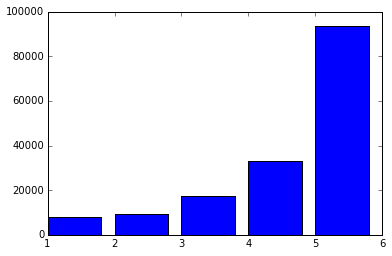

In [4]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
overallDF = df[["overall","reviewText"]]

data = df.groupby("overall")["overall"].count()
plt.bar(data.index.values,data.values)

In [5]:
cachedStopWords

NameError: name 'cachedStopWords' is not defined

In [36]:
# Hay que igualar y coger muestras de tamaño similar para todas las valoraciones?

## 2.-  Procesamiento de texto sobre las reviews
Eliminamos stopwords (TF-idf)
aplicamos métodos de lematizacion - TextBlob, NLTK
extraemos entidades (tokens)

## 3.- Extracción de muestras de test y de entrenamiento para el modelo
## 4.- Entrenamiento del modelo a partir de los datos de test.
## 5.- Ejecución del modelo. Evaluación de resultados, comparación con otros modelos Sentiment Analysis.

In [1]:
from textblob import TextBlob
from textblob import Word


In [2]:
import nltk
# nltk.download() hay que hacerlo la primera vez para cargar todos los corpus necesarios
#nltk.download()

In [26]:
TextBlob(overallDF["reviewText"][1]).words.lemmatize()


WordList([u'I', u'highly', u'recommend', u'this', u'series', u'It', u'is', u'a', u'must', u'for', u'anyone', u'who', u'is', u'yearning', u'to', u'watch', u'grown', u'up', u'television', u'Complex', u'character', u'and', u'plot', u'to', u'keep', u'one', u'totally', u'involved', u'Thank', u'you', u'Amazin', u'Prime'])

## funcion que elimina las stopwords y aplica lematizacion

In [3]:
from nltk.corpus import stopwords

cachedStopWords = stopwords.words("english")



In [9]:
cachedStopWords


[u'i',
 u'me',
 u'my',
 u'myself',
 u'we',
 u'our',
 u'ours',
 u'ourselves',
 u'you',
 u'your',
 u'yours',
 u'yourself',
 u'yourselves',
 u'he',
 u'him',
 u'his',
 u'himself',
 u'she',
 u'her',
 u'hers',
 u'herself',
 u'it',
 u'its',
 u'itself',
 u'they',
 u'them',
 u'their',
 u'theirs',
 u'themselves',
 u'what',
 u'which',
 u'who',
 u'whom',
 u'this',
 u'that',
 u'these',
 u'those',
 u'am',
 u'is',
 u'are',
 u'was',
 u'were',
 u'be',
 u'been',
 u'being',
 u'have',
 u'has',
 u'had',
 u'having',
 u'do',
 u'does',
 u'did',
 u'doing',
 u'a',
 u'an',
 u'the',
 u'and',
 u'but',
 u'if',
 u'or',
 u'because',
 u'as',
 u'until',
 u'while',
 u'of',
 u'at',
 u'by',
 u'for',
 u'with',
 u'about',
 u'against',
 u'between',
 u'into',
 u'through',
 u'during',
 u'before',
 u'after',
 u'above',
 u'below',
 u'to',
 u'from',
 u'up',
 u'down',
 u'in',
 u'out',
 u'on',
 u'off',
 u'over',
 u'under',
 u'again',
 u'further',
 u'then',
 u'once',
 u'here',
 u'there',
 u'when',
 u'where',
 u'why',
 u'how',
 u'all

In [145]:
overallDFsample=overallDF[1:5]
overallDFsample['reviewTextLemmatized']=overallDFsample.apply(lemmatizeReviewText,axis=1)
type (overallDFsample)

/usr/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


pandas.core.frame.DataFrame

In [2]:
overallDFsample

NameError: name 'overallDFsample' is not defined

In [76]:
babyDf = pd.DataFrame([convert(line) for line in file('reviews_Baby_5.json')])
babyDf.to_csv(csv_filename, encoding='utf-8', index=False)


In [30]:
babyDf['review_clean'][109033]

KeyError: 'review_clean'

In [31]:
import string
def remove_punctuation(text):    
    return text.translate(None, string.punctuation).lower()

def lemmatizeReviewText(row):
    words = TextBlob(row["review_clean"]).words.lemmatize()
    ext = ' '.join(word for word in words if word not in (cachedStopWords))
    return ext

# forzamos la columna reviewText como str para el correcto funcionamiento de remove_punctuation
babyDf = pd.DataFrame([convert(line) for line in file('reviews_Baby_5.json')])
babyDf['reviewText'] = babyDf['reviewText'].astype(str)
babyDf['review_clean'] = babyDf['reviewText'].apply(remove_punctuation)
babyDf['review_clean']= babyDf.apply(lemmatizeReviewText, axis=1)
babyDf['review_clean']=babyDf['review_clean'].apply(lambda x: x.lower())

babyDf.to_csv('reviews_Baby_5.csv', header=True,quoting=1)


0         perfect new parent able keep track baby feedin...
1         book life saver ha helpful able go back track ...
2         help know exactly baby day ha gone mother law ...
3         bought time older son bought newborn super eas...
4         wanted alternative printing daily log sheet na...
5         great basic wish space write thing wa bigger l...
6         3 month old son spend half day mother half nei...
7         book perfect im first time new mom book made e...
8         wanted love wa pretty expensive month worth ca...
9         baby tracker brand book absolute best tracker ...
10        postpartum stay hospital nurse ask keep log ba...
11        use babysitter grandma keep track go day weve ...
12        book great way keeping track daily changing fe...
13        ha column info need glance get home work nanny...
14        like log think would work better clearer pm se...
15        wife six month old baby boy around 4month mark...
16        thought keeping simple handwri

In [32]:
# Tratamos el dataset de Pets
petsDf = pd.DataFrame([convert(line) for line in file('reviews_Pet_Supplies_5.json')])
# petsDf.to_csv(csv_filename, encoding='utf-8', index=False)
# forzamos la columna reviewText como str para el correcto funcionamiento de remove_punctuation
petsDf['reviewText'] = petsDf['reviewText'].astype(str)
petsDf['review_clean'] = petsDf['reviewText'].apply(remove_punctuation)
petsDf['review_clean']= petsDf.apply(lemmatizeReviewText, axis=1)
petsDf['review_clean']= petsDf['review_clean'].apply(lambda x: x.lower())
petsDf.to_csv('reviews_Pet_Supplies_5.csv', header=True,quoting=1)

In [38]:
# Concatenamos el dataset a partir de Pets y Babies

frames = [babyDf,petsDf]

babiesPetsDf = pd.concat(frames)




318628

In [1]:

babiesPetsDf.to_csv('babies+pets_reviews.csv', header=True,quoting=1)

NameError: name 'babiesPetsDf' is not defined

In [4]:
# comprobamos que está bien generado el csv volviendolo a cargar en el DF
import json
import pandas as pd
babiesPetsDf=pd.read_csv('babies+pets_reviews.csv',header=False,sep=',')
babiesPetsDf['review_clean'].sample(10)



268599    nothing great thing say blue buffalo product r...
110798    attend work conference thought would purchase ...
218728    love company quality product excellent custome...
220497    competitor product wa dark color crumbly made ...
314210    easy install look great color matching highlan...
66635     nice soft tie easily gentle teething son gum p...
73390     product worth super sturdy imagine going last ...
186168    isnt favorite good variety diet girl like pate...
191465    ok dog like favorite work toy use treat since ...
284166    beautiful vivid color sturdy even withheld 4 m...
Name: review_clean, dtype: object

In [12]:
#  crear un diccionario {palabra:ocurrencias}
import numpy as np
cnt = {}
for linea in babiesPetsDf['review_clean'].astype(str).values:
    for word in linea.split():
        if (word not in cnt):
            cnt[word] = 1
        else:
            cnt[word] += 1
            
wordsSerie=pd.Series(cnt,index=cnt.keys())
wordsSerie=wordsSerie[wordsSerie.values>1]
data={'a':wordsSerie.index,'b':wordsSerie.values}
wordsDf=pd.DataFrame(data=data, index=np.arange(len(wordsSerie)))
wordsDf=wordsDf.sort('b', ascending=False).head(3000)

In [13]:
wordsDf

,a,b
73974,wa,181452
45914,one,159613
78246,dog,135114
3958,like,130835
27250,love,115680
65879,baby,107178
3199,get,105242
68819,would,100830
75180,use,98451
29521,ha,94032


In [14]:
important_words = str([str(s) for s in wordsDf['a']])
f= open('important_words_3000.json', 'w') 
f.write(important_words.replace("'",'"'))
f.close()